<a href="https://colab.research.google.com/github/suramshivamani/AIML-2025/blob/main/classified_data_using_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("/content/Classified_Data.txt")
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1000 non-null   int64  
 1   WTT           1000 non-null   float64
 2   PTI           1000 non-null   float64
 3   EQW           1000 non-null   float64
 4   SBI           1000 non-null   float64
 5   LQE           1000 non-null   float64
 6   QWG           1000 non-null   float64
 7   FDJ           1000 non-null   float64
 8   PJF           1000 non-null   float64
 9   HQE           1000 non-null   float64
 10  NXJ           1000 non-null   float64
 11  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 93.9 KB


In [5]:
df.isnull().sum()

,0
Unnamed: 0,0
WTT,0
PTI,0
EQW,0
SBI,0
LQE,0
QWG,0
FDJ,0
PJF,0
HQE,0


In [8]:
df=df.dropna()

In [9]:
df.isnull().sum()

,0
Unnamed: 0,0
WTT,0
PTI,0
EQW,0
SBI,0
LQE,0
QWG,0
FDJ,0
PJF,0
HQE,0


In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [13]:
scaler.fit(df.drop('TARGET CLASS',axis=1))
scaled_features=scaler.transform(df.drop('TARGET CLASS',axis=1))

In [16]:
df_feat=pd .DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()


,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [17]:
from sklearn.model_selection import train_test_split
x=df_feat
y=df['TARGET CLASS']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [19]:
pred=knn.predict(x_test)

In [20]:
from sklearn.metrics import classification_report,confusion_matrix
conf_mat=confusion_matrix(y_test,pred)
print(conf_mat)

[[145  14]
 [ 12 129]]


In [21]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       159
           1       0.90      0.91      0.91       141

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [22]:
print('misclassification error rate',round(np.mean(pred!=y_test),3))

misclassification error rate 0.087


In [24]:
error_rate=[]
for i in range(1,60):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  pred_i=knn.predict(x_test)
  error_rate.append(np.mean(pred_i!=y_test))
  print(np.mean(pred_i!=y_test))

0.08666666666666667
0.09
0.07666666666666666
0.07333333333333333
0.08
0.06666666666666667
0.07666666666666666
0.06666666666666667
0.06333333333333334
0.06666666666666667
0.056666666666666664
0.06
0.07
0.06666666666666667
0.06666666666666667
0.06666666666666667
0.06666666666666667
0.07
0.07333333333333333
0.06
0.06333333333333334
0.056666666666666664
0.05333333333333334
0.05
0.05
0.04666666666666667
0.05333333333333334
0.05
0.05
0.043333333333333335
0.05
0.05
0.05333333333333334
0.05333333333333334
0.056666666666666664
0.056666666666666664
0.06
0.06
0.06
0.05333333333333334
0.056666666666666664
0.05333333333333334
0.05333333333333334
0.05
0.05
0.05
0.05333333333333334
0.05
0.05333333333333334
0.05333333333333334
0.05333333333333334
0.05333333333333334
0.05333333333333334
0.05333333333333334
0.05333333333333334
0.05333333333333334
0.05333333333333334
0.05333333333333334
0.05333333333333334


Text(0, 0.5, 'Error Rate')

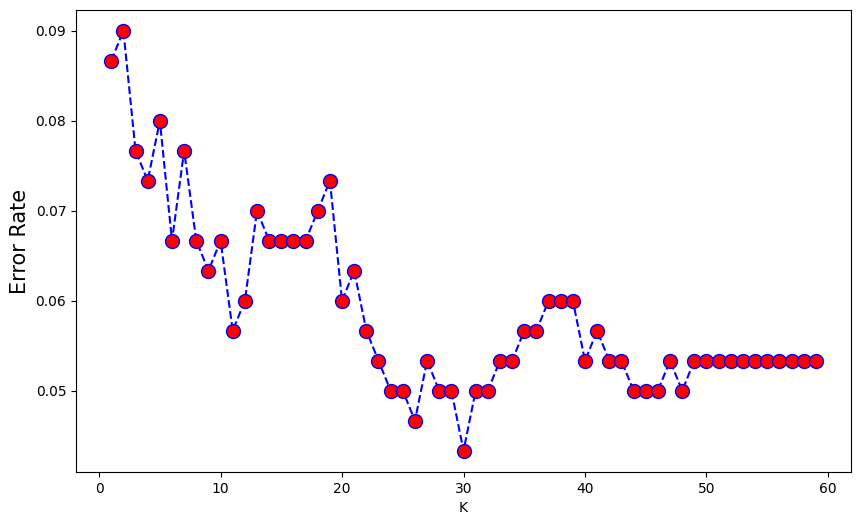

In [27]:
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.xlabel('K')
plt.ylabel('Error Rate',fontsize=15)
